# Case HR
#### The case revolves around a fictitious company and the core data set contains: names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, performance score, absences, most recent performance review date, and employee engagement score.

##### Our objective is to find out how the HR policy of the company can improve:
##### 1 - What are our best recruiting sources if we want to ensure a diverse organization?

##### 2 - Is there any relationship between who a person works for and their performance score?

##### 3 - Which are the main reasons our employees are leaving us?
##### Revisar los motivos de dropout de los empleados


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [3]:
df=pd.read_csv('../datasets/HRDataset_clean.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
df.shape

(311, 36)

In [5]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,15.167203,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.842585,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,16.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.500000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [6]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 


Preview of data with null values:
xxxxxxxxxxxxx
         Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0  Adinolfi, Wilson  K  10026          0                0         1   
3         Alagbe,Trina  10088          1                1         0   
5    Anderson, Linda    10002          0                0         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
3            1       5            3                       0   64991  ...   
5            1       5            4                       0   57568  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert       22.0          LinkedIn          Exceeds   
3    Elijiah Gray       16.0            Indeed      Fully Meets   
5        Amy Dunn       11.0          LinkedIn          Exceeds   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              4.60             

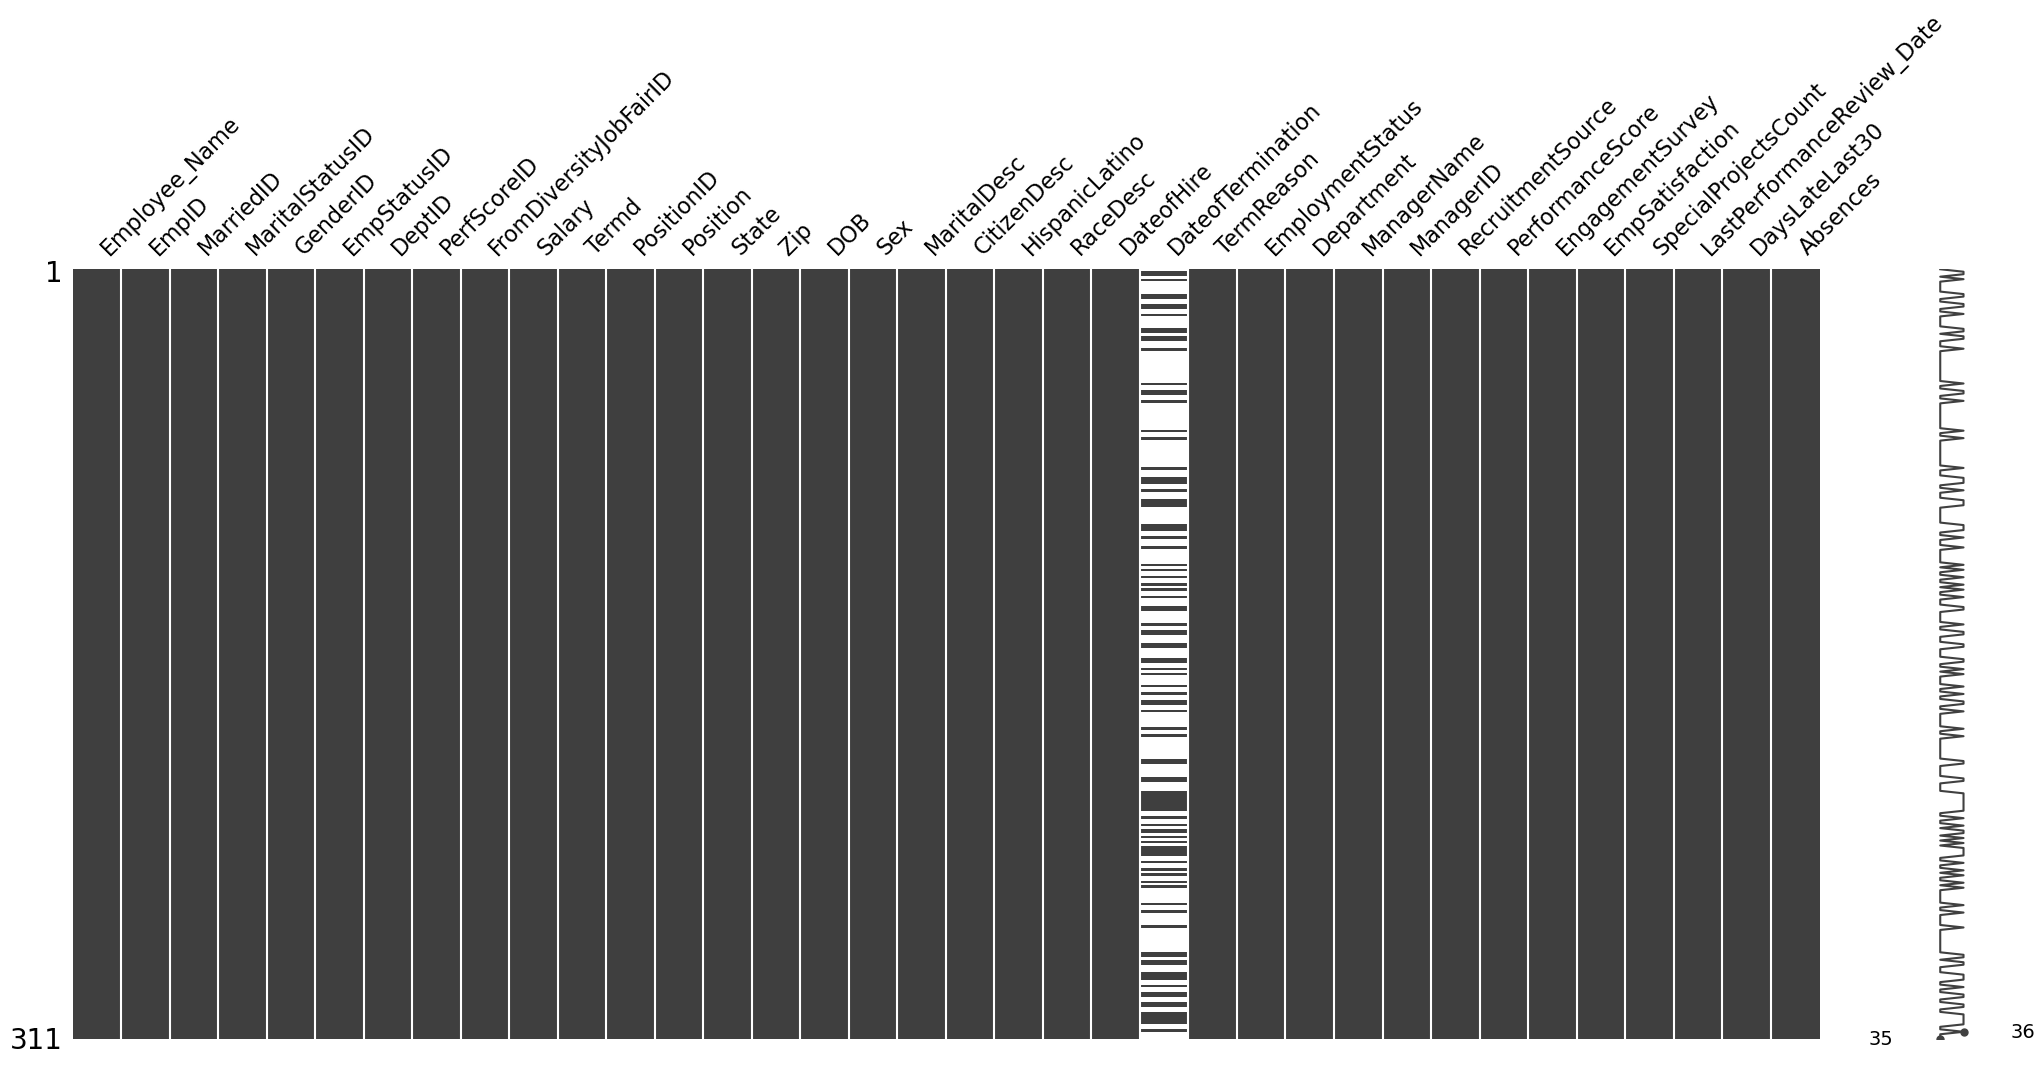

In [7]:
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

### We see that there is a lot of ID columns that the numbers refer to a categorical variable, so we change it into str

In [9]:
for column_name in df.columns:
    # Check if the column name contains 'ID' excluding the PerfScore ID whic is a proper numerical variable
    if 'ID' in column_name and column_name != 'PerfScoreID':
        # Change the column dtype to string
        df[column_name] = df[column_name].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    object 
 2   MarriedID                   311 non-null    object 
 3   MaritalStatusID             311 non-null    object 
 4   GenderID                    311 non-null    object 
 5   EmpStatusID                 311 non-null    object 
 6   DeptID                      311 non-null    object 
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    object 
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    object 
 12  Position                    311 non-null    object 
 13  State                       311 non

In [10]:
#now we also want to check for duplicates
df = df.drop_duplicates()
df.shape

(311, 36)

In [11]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [12]:
#there is an issue with the name of Production, on the key department. We fix this by:
# Change the column name from 'old_column_name' to 'new_column_name'
df['Department'] = df['Department'].replace('Production       ', 'Production', regex=True)
df['Department'].unique()

array(['Production', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

In [13]:
#now that we have the data frame in the proper dtype format and we had verified that there are no duplicates, we explore the columns that are objects
for col in df.columns: 
    if df[col].dtype == 'object':
        if df[col].nunique() < 10: 
            print(col)
            print(df[col].value_counts())
            print()
        else:
            print('It was not shown: {}'.format(col))

It was not shown: Employee_Name
It was not shown: EmpID
MarriedID
0    187
1    124
Name: MarriedID, dtype: int64

MaritalStatusID
0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64

GenderID
0    176
1    135
Name: GenderID, dtype: int64

EmpStatusID
1    184
5     88
3     14
4     14
2     11
Name: EmpStatusID, dtype: int64

DeptID
5    208
3     50
6     32
4     10
1     10
2      1
Name: DeptID, dtype: int64

FromDiversityJobFairID
0    282
1     29
Name: FromDiversityJobFairID, dtype: int64

It was not shown: PositionID
It was not shown: Position
It was not shown: State
It was not shown: DOB
Sex
F     176
M     135
Name: Sex, dtype: int64

MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

CitizenDesc
US Citizen             295
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64

HispanicLatino
No     282
Yes     27
no       1
yes      1


In [14]:
#we also can see that there is a problem with some of the columns that contain the same information but written in different ways, lets fix that
df['HispanicLatino'] = df['HispanicLatino'].str.lower()
df['HispanicLatino'].value_counts()

no     283
yes     28
Name: HispanicLatino, dtype: int64

## 1.What are our best recruiting sources if we want to ensure a diverse organization?

In [15]:
#We group the data by each 'RecruitmentSource' and the 'RaceDesc' column and count how many per each cathegory
df.groupby('RecruitmentSource')[['HispanicLatino','RaceDesc']].value_counts()

RecruitmentSource        HispanicLatino  RaceDesc                        
CareerBuilder            no              White                               15
                                         Black or African American            5
                                         Asian                                2
                         yes             White                                1
Diversity Job Fair       no              Black or African American           22
                         yes             Black or African American            7
Employee Referral        no              White                               22
                                         Black or African American            5
                         yes             White                                3
                         no              Asian                                1
Google Search            no              White                               31
                                         Asian

Text(0.5, 1.0, 'RecruitmentSource by Race')

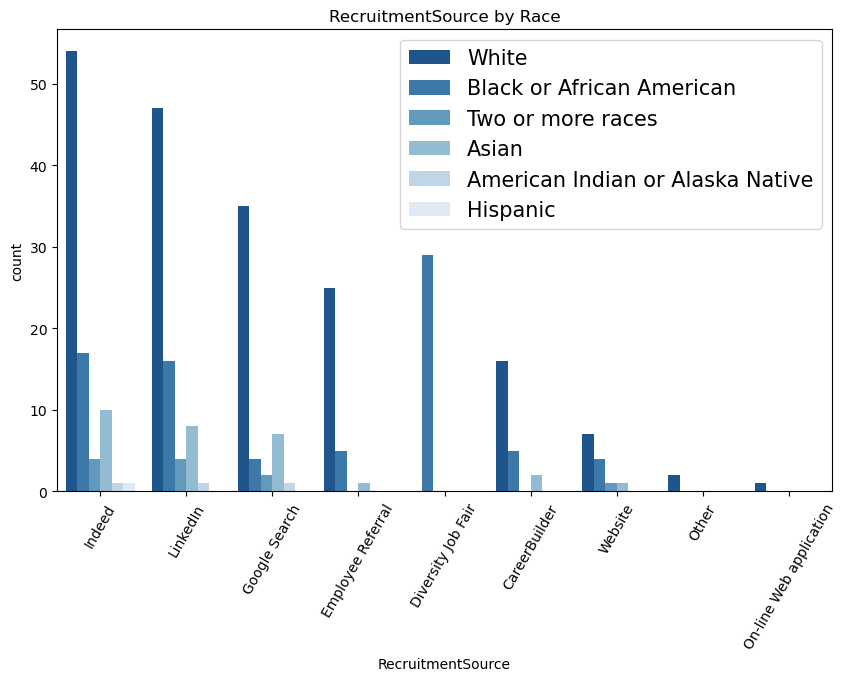

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RecruitmentSource', data=df, hue='RaceDesc',order=df['RecruitmentSource'].value_counts().index ,palette='Blues_r')
plt.legend(prop={'size': 15})
plt.xticks(rotation=60)
plt.title('RecruitmentSource by Race')

In [17]:
#we see that in the cathegory of "whites" there are some HispanicLatinos, so we have to include them aswell in the diversity dataframe we want to analyze
df.groupby('HispanicLatino')[['RaceDesc']].value_counts().sort_values(ascending=False)

HispanicLatino  RaceDesc                        
no              White                               169
                Black or African American            72
                Asian                                29
yes             White                                18
no              Two or more races                    10
yes             Black or African American             8
no              American Indian or Alaska Native      3
yes             Hispanic                              1
                Two or more races                     1
dtype: int64

### We can see that there is 18 White HispanicLatino people that we have to include in the diversity group

In [18]:
#we see that white people will not be included in the "Diversity", so we have to exclude them to from the analysis
df_diversity = df[~((df['HispanicLatino'] == 'no')&(df['RaceDesc'] == 'White'))]
#The ~ symbol is used to negate the entire condition, effectively selecting rows where the condition is False.

In [19]:
df_diversity.shape

(142, 36)

In [20]:
df_diversity.groupby('HispanicLatino')[['RaceDesc']].value_counts().sort_values(ascending=False)

HispanicLatino  RaceDesc                        
no              Black or African American           72
                Asian                               29
yes             White                               18
no              Two or more races                   10
yes             Black or African American            8
no              American Indian or Alaska Native     3
yes             Hispanic                             1
                Two or more races                    1
dtype: int64

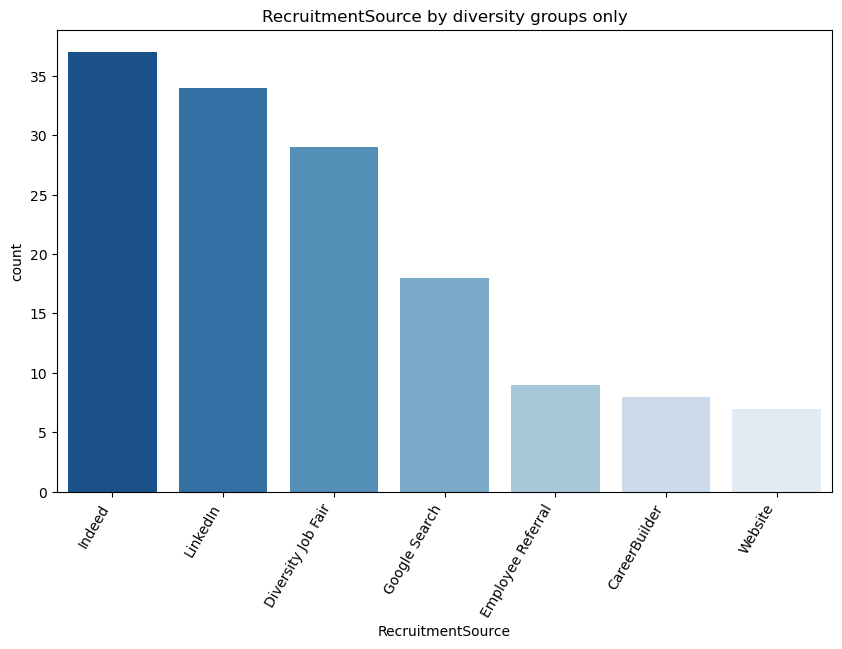

In [21]:
#we also know that we could group the rest of the values in the 'RaceDesc' as from the 'Diversity' group (no need to create distinctions)
plt.figure(figsize=(10, 6))
sns.countplot(x='RecruitmentSource', data=df_diversity, order=df_diversity['RecruitmentSource'].value_counts().index, palette='Blues_r')

plt.xticks(rotation=60, ha='right')
plt.title('RecruitmentSource by diversity groups only')
plt.show()

### we can also calculate the ratio of diversity per each RecruitmentSource from the total of employees

In [22]:
#we will create a function that divides the sum of all the 'RecruitmmentSource' sum per each category from the df_diversity by the same but from the df dataframe
def ratio(x, y):
    result = (x/y)*100
    return round(result,2)
DiversityRatio = ratio(df_diversity['RecruitmentSource'].value_counts(), df['RecruitmentSource'].value_counts()).fillna(0)
DiversityRatio

CareerBuilder               34.78
Diversity Job Fair         100.00
Employee Referral           29.03
Google Search               36.73
Indeed                      42.53
LinkedIn                    44.74
On-line Web application      0.00
Other                        0.00
Website                     53.85
Name: RecruitmentSource, dtype: float64

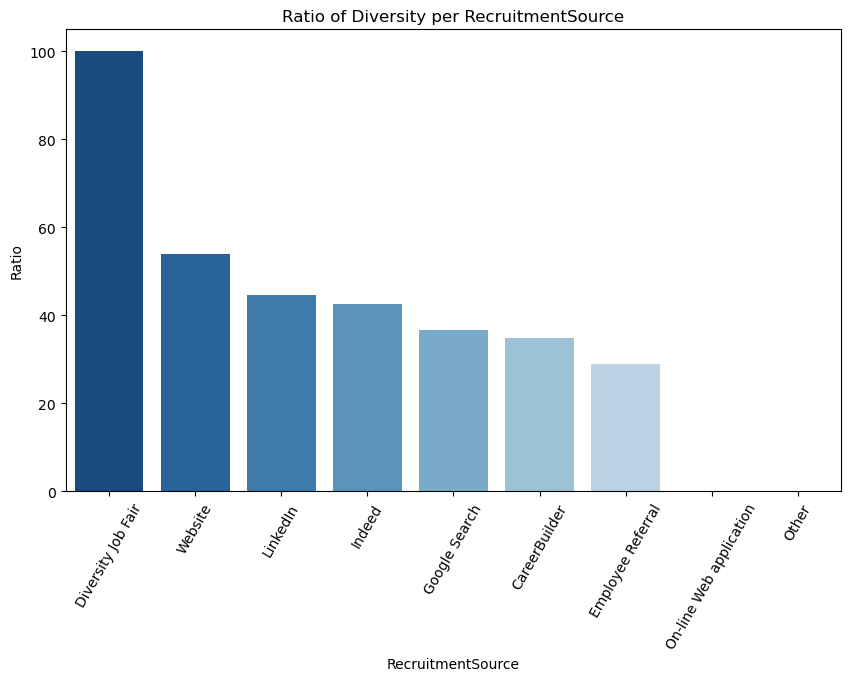

In [23]:
DiversityRatio_sorted = DiversityRatio.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=DiversityRatio_sorted.index, y=DiversityRatio_sorted.values, palette='Blues_r')

plt.title('Ratio of Diversity per RecruitmentSource')
plt.xlabel('RecruitmentSource')
plt.ylabel('Ratio')
plt.xticks(rotation=60)

plt.show()

## 2 - Is there any relationship between who a person works for and their performance score?

In [24]:
PerfbyManager = df.groupby('ManagerName')['PerfScoreID'].mean().round(2)
PerfbyManager

ManagerName
Alex Sweetwater       3.11
Amy Dunn              2.90
Board of Directors    3.00
Brandon R. LeBlanc    3.00
Brannon Miller        2.82
Brian Champaigne      3.00
David Stanley         3.00
Debra Houlihan        2.67
Elijiah Gray          3.00
Eric Dougall          3.25
Janet King            3.11
Jennifer Zamora       3.14
John Smith            2.71
Kelley Spirea         3.09
Ketsia Liebig         3.05
Kissy Sullivan        2.95
Lynn Daneault         3.00
Michael Albert        2.86
Peter Monroe          2.86
Simon Roup            3.12
Webster Butler        3.00
Name: PerfScoreID, dtype: float64

In [25]:
EmpbyManager = df.groupby('ManagerName')['EmpID'].count().sort_values(ascending=False)
EmpbyManager

ManagerName
Michael Albert        22
Kissy Sullivan        22
Brannon Miller        22
Kelley Spirea         22
Elijiah Gray          22
Webster Butler        21
Amy Dunn              21
Ketsia Liebig         21
David Stanley         21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Jennifer Zamora        7
Brandon R. LeBlanc     7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: EmpID, dtype: int64

In [26]:
df_managerperfv = pd.merge(df['ManagerName'], PerfbyManager, on='ManagerName')
df_managerperfv = df_managerperfv.drop_duplicates().sort_values('PerfScoreID', ascending=False)
# A continuación creo una nueva columna en la que aparece la media de performance de los empleados para cada manager normalizado para la media de todas las medias obtenidas por cada manager
df_managerperfv['PerfScoreIDNorm'] = df_managerperfv['PerfScoreID'] / (df_managerperfv['PerfScoreID'].sum() / df_managerperfv['PerfScoreID'].count())

df_managerperfv

,ManagerName,PerfScoreID,PerfScoreIDNorm
294,Eric Dougall,3.25,1.089559
274,Jennifer Zamora,3.14,1.052682
22,Simon Roup,3.12,1.045977
125,Alex Sweetwater,3.11,1.042625
241,Janet King,3.11,1.042625
212,Kelley Spirea,3.09,1.035920
134,Ketsia Liebig,3.05,1.022510
191,David Stanley,3.00,1.005747
301,Brian Champaigne,3.00,1.005747
281,Lynn Daneault,3.00,1.005747


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Michael Albert'),
  Text(1, 0, 'Kissy Sullivan'),
  Text(2, 0, 'Elijiah Gray'),
  Text(3, 0, 'Kelley Spirea'),
  Text(4, 0, 'Brannon Miller'),
  Text(5, 0, 'Ketsia Liebig'),
  Text(6, 0, 'David Stanley'),
  Text(7, 0, 'Amy Dunn'),
  Text(8, 0, 'Webster Butler'),
  Text(9, 0, 'Janet King'),
  Text(10, 0, 'Simon Roup'),
  Text(11, 0, 'Peter Monroe'),
  Text(12, 0, 'John Smith'),
  Text(13, 0, 'Lynn Daneault'),
  Text(14, 0, 'Alex Sweetwater'),
  Text(15, 0, 'Brian Champaigne'),
  Text(16, 0, 'Brandon R. LeBlanc'),
  Text(17, 0, 'Jennifer Zamora'),
  Text(18, 0, 'Eric Dougall'),
  Text(19, 0, 'Debra Houlihan'),
  Text(20, 0, 'Board of Directors')])

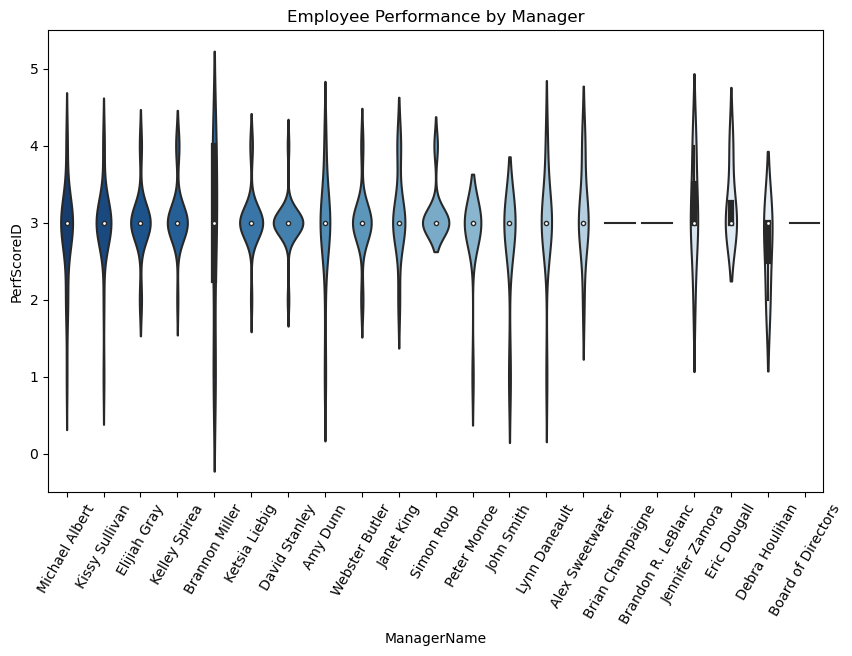

In [27]:
#el siguiente gráfico esta ordenado de manager con más empleados a menos
plt.figure(figsize=(10, 6))
sns.violinplot(x='ManagerName',y='PerfScoreID',data=df,palette='Blues_r',order=df['ManagerName'].value_counts().index)
plt.title('Employee Performance by Manager')
plt.xticks(rotation=60)

### Podemos concluir que no existe una relación directa, entre el manager y la performance score de sus empleados, exceptuando algunos casos puntuales

C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\1318317679.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_filtered = df.drop(columns_to_exclude, axis=1).corr()


[None, None, None, None, None, None, None, None, None, None]

<Figure size 1000x600 with 0 Axes>

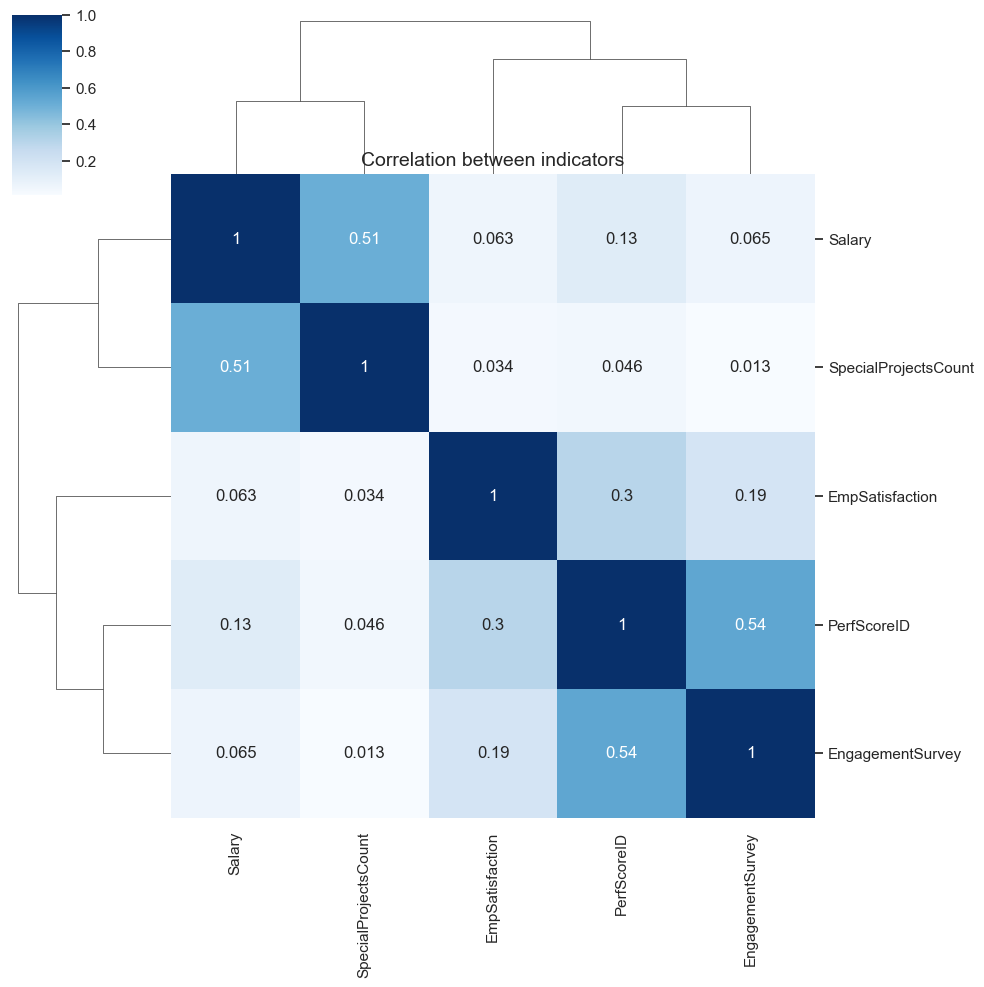

In [28]:
# por otro lado, podemos identificar mediante un mapa de coorrelación, otras variables que SI afectan a la PerfScore de los empleados
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
# Exclude specific columns from the correlation matrix
columns_to_exclude = ['Zip', 'Termd','Absences','DaysLateLast30']
corr_filtered = df.drop(columns_to_exclude, axis=1).corr()
#create the plot
clustermap = sns.clustermap(corr_filtered, annot=True, cmap='Blues')
clustermap.ax_heatmap.set_title('Correlation between indicators', fontsize=14)
# Rotate the y-axis labels horizontally
plt.setp(clustermap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

Text(0, 0.5, 'Performance Score')

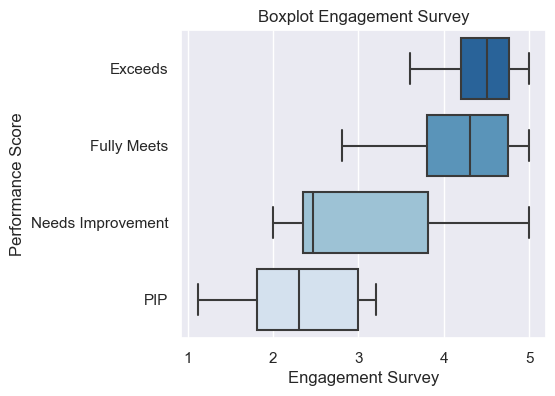

In [29]:
plt.figure(figsize=(16, 4))

# Boxplot engagement survey

plt.subplot(1, 3, 1)

sns.boxplot(x='EngagementSurvey', y='PerformanceScore', data=df, palette='Blues_r')

plt.title('Boxplot Engagement Survey')

plt.xlabel('Engagement Survey')

plt.ylabel('Performance Score')

#### We can see there is a good correlation between the Performance Score and the Level of engagment of the Employees, which make sense. On the other hand, we also see that the re is correlation, in second degree, with the satisfaction of the employee. In 3rd degree, we see that it correlates with the Salary, which at the same time, is highly influenced by the Special Projects each employee has carried out.
### <span style="color:red">So the conclusion here could be that a much more implication in Special projects, could lead to an increase of salaray and motivation, resulting in a final increase in the performance of the employee.

## 3 - Which are the main reasons our employees are leaving us?

In [30]:
#lets firs texplore the Termination reason behind people quiting the job
df['TermReason'].value_counts().sort_values(ascending=False)

N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
retiring                              4
performance                           4
no-call, no-show                      4
military                              4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: TermReason, dtype: int64

In [31]:
#we can see that there is a value of N/A-StillEmployed that we are not interested in. For that, we will create a new df whit all this values removed
df_terminated = df[df['TermReason'] != 'N/A-StillEmployed']
df_terminated['TermReason'].value_counts()

Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
return to school                     5
relocation out of area               5
no-call, no-show                     4
military                             4
retiring                             4
performance                          4
maternity leave - did not return     3
medical issues                       3
Learned that he is a gangster        1
Fatal attraction                     1
gross misconduct                     1
Name: TermReason, dtype: int64

In [32]:
#we see there is a lot of categories in the 'TermReason' column, so we will group the less frequent ones in one category called 'Others' (and also, there are some "reasons" that doesn't make sense)
# List of string values to merge into 'Others'
merge_values = ['Another position','unhappy','more money','career change','hours','attendance','return to school','relocation out of area']

# Replace rows with merge_values with 'Others'
df_terminated.loc[~df_terminated['TermReason'].isin(merge_values), 'TermReason'] = 'Others'

df_terminated['TermReason'].value_counts()

Others                    25
Another position          20
unhappy                   14
more money                11
career change              9
hours                      8
attendance                 7
return to school           5
relocation out of area     5
Name: TermReason, dtype: int64

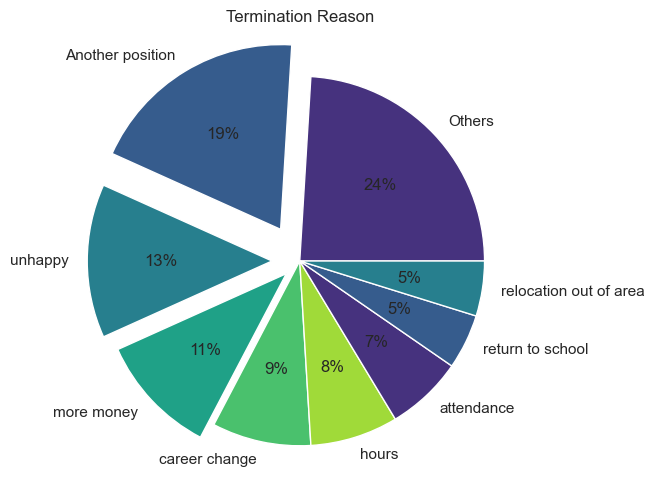

In [33]:
plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('viridis')

term_reason_counts = df_terminated['TermReason'].value_counts()

# Define the categories to explode
explode_categories = ['Another position', 'unhappy', 'more money']

# Define the explosion levels for the specified categories
explode_levels = [0.2, 0.15, 0.1]

# Create a list to store the explosion values for all categories
explode = [explode_levels[explode_categories.index(reason)] if reason in explode_categories else 0 for reason in term_reason_counts.index]

# Plotting data on the chart
plt.pie(term_reason_counts, labels=term_reason_counts.index, colors=palette_color, explode=explode, autopct='%.0f%%')

plt.title('Termination Reason')

# Displaying the chart
plt.show()

### we can see that there the principial reasons behind people leaving are because they are looking for another position, are unhappy, or they feel that they are not pay for their job done

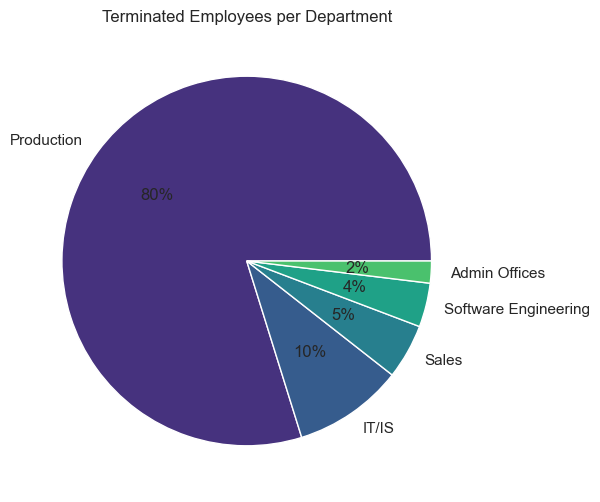

In [34]:
#I am curiose to see if there is a relation with the department they were from
plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('viridis')

term_depart_counts = df_terminated['Department'].value_counts()

# Plotting data on the chart
plt.pie(term_depart_counts, labels=term_depart_counts.index, colors=palette_color, autopct='%.0f%%')

plt.title('Terminated Employees per Department')
# Displaying the chart
plt.show()

### We see there is a clear problem in the Production department. Lets focus on this department

In [35]:
df_prodterm = df_terminated[df_terminated['Department'] == 'Production']
df_prodterm.shape

(83, 36)

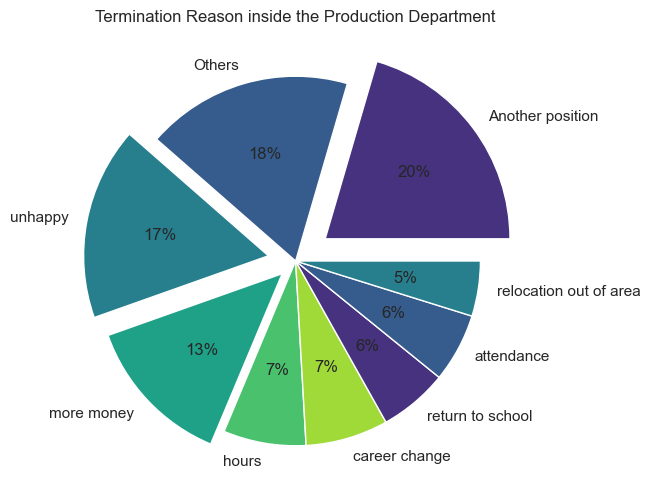

In [36]:
#lets check, inside of these department, what are the main reasons of people leaving the company:
plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('viridis')

term_reason_counts = df_prodterm['TermReason'].value_counts()

# Define the categories to explode
explode_categories = ['Another position', 'unhappy', 'more money']

# Define the explosion levels for the specified categories
explode_levels = [0.2, 0.15, 0.1]

# Create a list to store the explosion values for all categories
explode = [explode_levels[explode_categories.index(reason)] if reason in explode_categories else 0 for reason in term_reason_counts.index]

# Plotting data on the chart
plt.pie(term_reason_counts, labels=term_reason_counts.index, colors=palette_color, explode=explode, autopct='%.0f%%')

plt.title('Termination Reason inside the Production Department')

# Displaying the chart
plt.show()

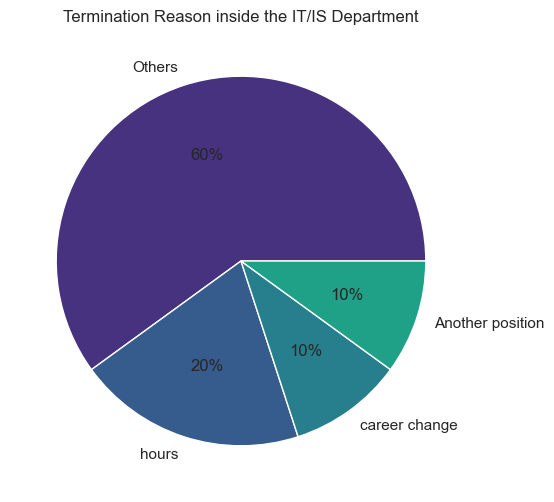

In [37]:
#let's see the reasons for leaving in the other more critical departments
df_ITISterm = df_terminated[df_terminated['Department'] == 'IT/IS']
plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('viridis')

term_reason_counts = df_ITISterm['TermReason'].value_counts()

# Plotting data on the chart
plt.pie(term_reason_counts, labels=term_reason_counts.index, colors=palette_color, autopct='%.0f%%')

plt.title('Termination Reason inside the IT/IS Department')

# Displaying the chart
plt.show()

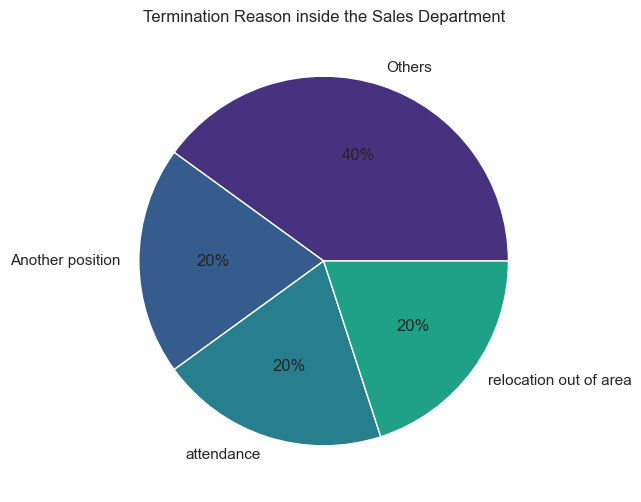

In [38]:
df_Salesterm = df_terminated[df_terminated['Department'] == 'Sales']
plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('viridis')

term_reason_counts = df_Salesterm['TermReason'].value_counts()

# Plotting data on the chart
plt.pie(term_reason_counts, labels=term_reason_counts.index, colors=palette_color, autopct='%.0f%%')

plt.title('Termination Reason inside the Sales Department')

# Displaying the chart
plt.show()

### We see a bit of variability upon the reasons people leave depending on the Department, but seems that for "another position" is a pretty common reason.
### Also, in the Production Department, we see that "unhappy" has a considerable weight as well.

## We will now focus on the Production Department, as it is the most critical one with a 80% of the employees quitting. Lets try to identify the what are the sources of this flight of talent

In [39]:
#Lets also check what are the managers per department:
df_prodterm.groupby('ManagerName')['EmpSatisfaction'].mean().sort_values(ascending=True)

ManagerName
Brannon Miller    3.000000
Janet King        3.400000
Kissy Sullivan    3.666667
Elijiah Gray      3.750000
Amy Dunn          3.769231
David Stanley     3.833333
Ketsia Liebig     4.000000
Webster Butler    4.076923
Kelley Spirea     4.333333
Michael Albert    4.444444
Name: EmpSatisfaction, dtype: float64

In [40]:
df_prodterm.groupby('ManagerName')['EngagementSurvey'].mean().sort_values(ascending=True)

ManagerName
Elijiah Gray      3.832500
Janet King        3.834000
Ketsia Liebig     3.872000
Brannon Miller    3.900000
Kissy Sullivan    3.975000
Amy Dunn          3.981538
David Stanley     4.145000
Michael Albert    4.293333
Webster Butler    4.367692
Kelley Spirea     4.683333
Name: EngagementSurvey, dtype: float64

In [41]:
df_prodterm.groupby('ManagerName')['PerfScoreID'].mean().sort_values(ascending=True)

ManagerName
Brannon Miller    2.166667
Elijiah Gray      2.750000
Janet King        2.800000
Kissy Sullivan    2.833333
Amy Dunn          2.923077
Webster Butler    2.923077
Ketsia Liebig     3.000000
Michael Albert    3.000000
David Stanley     3.166667
Kelley Spirea     3.166667
Name: PerfScoreID, dtype: float64

### We represent these 3 parameters in the following graph

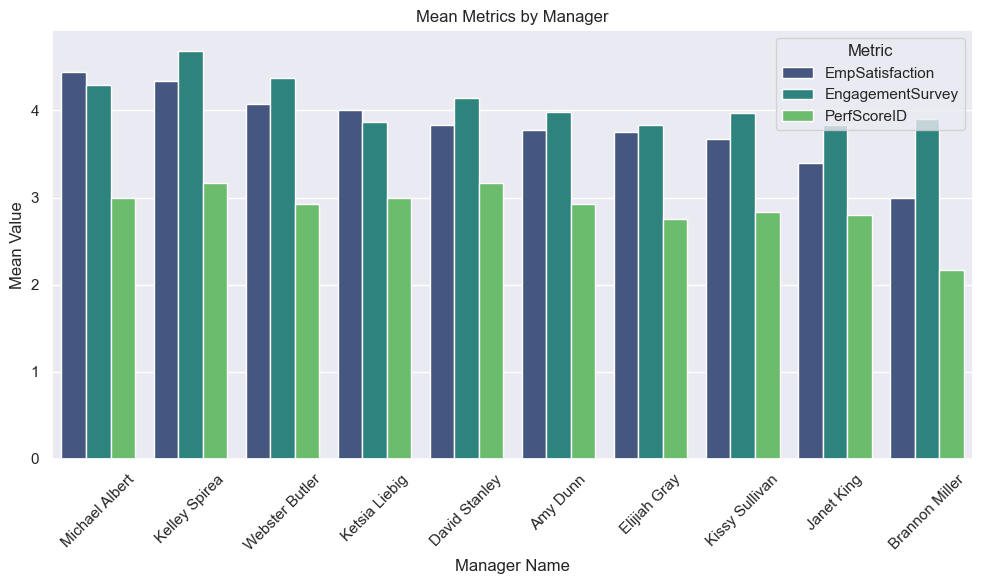

In [42]:
# Grouping and calculating the mean for each group
mean_emp_satisfaction = df_prodterm.groupby('ManagerName')['EmpSatisfaction'].mean().sort_values(ascending=True)
mean_engagement_survey = df_prodterm.groupby('ManagerName')['EngagementSurvey'].mean().sort_values(ascending=True)
mean_perf_score = df_prodterm.groupby('ManagerName')['PerfScoreID'].mean().sort_values(ascending=True)

# Combining the means into a single DataFrame
df_means = pd.DataFrame({
    'EmpSatisfaction': mean_emp_satisfaction,
    'EngagementSurvey': mean_engagement_survey,
    'PerfScoreID': mean_perf_score
})

# Resetting the index to make 'ManagerName' a column
df_means = df_means.reset_index()

# Sorting the DataFrame by the mean of 'EmpSatisfaction' in descending order
df_means = df_means.sort_values(by='EmpSatisfaction', ascending=False)

# Melt the DataFrame to convert it into a long format
df_melted = df_means.melt('ManagerName', var_name='Metric', value_name='Mean')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='ManagerName', y='Mean', hue='Metric',palette='viridis')

plt.title('Mean Metrics by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Mean Value')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
#lets see the ration of amount of employees leaving per each manager in the Department of Production to see if there is a correlation
df_production = df[df['Department'] == 'Production']
TerminatedRatio_Manager=ratio(df_prodterm['ManagerName'].value_counts(), df_production['ManagerName'].value_counts()).fillna(0).sort_values(ascending=False)
TerminatedRatio_Manager

Amy Dunn          61.90
Webster Butler    61.90
Kissy Sullivan    54.55
Michael Albert    40.91
Elijiah Gray      36.36
Janet King        33.33
David Stanley     28.57
Brannon Miller    27.27
Kelley Spirea     27.27
Ketsia Liebig     23.81
Name: ManagerName, dtype: float64

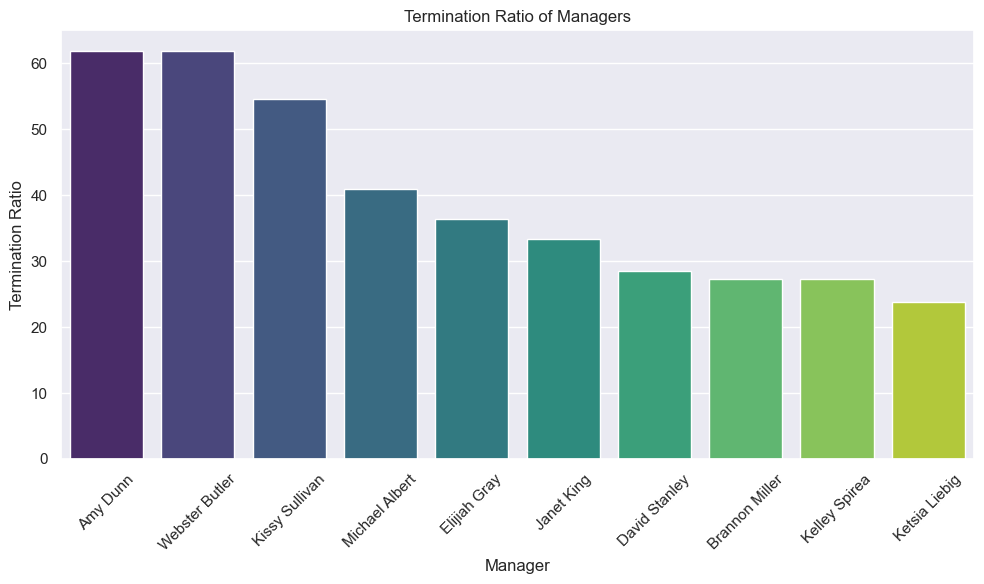

In [44]:
#Now Let's plot the previows information
# Sort the termination ratio values in descending order
terminated_ratio_manager_sorted = TerminatedRatio_Manager.sort_values(ascending=False)

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=terminated_ratio_manager_sorted.index, y=terminated_ratio_manager_sorted, palette='viridis')

# Set the labels and title
plt.xlabel('Manager')
plt.ylabel('Termination Ratio')
plt.title('Termination Ratio of Managers')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Clearly, there is no correlation between the manager and the Scores of the employees that quit the company. So the problem is not with the managers

In [45]:
#Lets see if there is a relation between the number of Special projects and the quiting of the employees
df_prodterm['SpecialProjectsCount'].value_counts()

0    83
Name: SpecialProjectsCount, dtype: int64

### No special projects have been carried out in the department of Production

In [46]:
#Is there any relation with the amount of Special projects and the people leaving the company?
df.groupby('Department')['SpecialProjectsCount'].sum().sort_values(ascending=False)

Department
IT/IS                   296
Software Engineering     46
Admin Offices            33
Production                4
Executive Office          0
Sales                     0
Name: SpecialProjectsCount, dtype: int64

In [47]:
#We check for the departments with higher ration of employees leaving
TerminatedRatio_Dept=ratio(df_terminated['Department'].value_counts(), df['Department'].value_counts()).fillna(0).sort_values(ascending=False)
TerminatedRatio_Dept

Production              39.71
Software Engineering    36.36
Admin Offices           22.22
IT/IS                   20.00
Sales                   16.13
Executive Office         0.00
Name: Department, dtype: float64

### We also can see that there is no correlation between the number of special projects and the number of employees quiting

## <span style="color:red"> We have to conclude, that, probably, the reason people of the Production department leaves the company is based on other parameters we cant measure

## Lets go back to the overall data of the people that has left the company

In [48]:
#It could be interesting to see the seniority inside the company of the people leaving the company
#First, we will change the dates to datetime and create another column with the time they have been in the company (by the difference between the date of hire and the date of the termination)
df_terminated['DateofHire'] = pd.to_datetime(df_terminated['DateofHire'])
df_terminated['DateofTermination'] = pd.to_datetime(df_terminated['DateofTermination'])
#we also will change the format of the other date columns
df_terminated['LastPerformanceReview_Date'] = pd.to_datetime(df_terminated['LastPerformanceReview_Date'])
df_terminated.dtypes

C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\2508964274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['DateofHire'] = pd.to_datetime(df_terminated['DateofHire'])
C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\2508964274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['DateofTermination'] = pd.to_datetime(df_terminated['DateofTermination'])
C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\2508964274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

Employee_Name                         object
EmpID                                 object
MarriedID                             object
MaritalStatusID                       object
GenderID                              object
EmpStatusID                           object
DeptID                                object
PerfScoreID                            int64
FromDiversityJobFairID                object
Salary                                 int64
Termd                                  int64
PositionID                            object
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

In [49]:
#we now create the new column with the the difference between the date of termination and the date of hire
df_terminated['Daysworked'] = df_terminated['DateofTermination'] - df_terminated['DateofHire']
df_terminated['Daysworked']=pd.to_timedelta(df_terminated['Daysworked'], unit='d')
df_terminated['Daysworked'] = df_terminated['Daysworked'].dt.days
df_terminated.dtypes

C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\350556403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['Daysworked'] = df_terminated['DateofTermination'] - df_terminated['DateofHire']
C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\350556403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['Daysworked']=pd.to_timedelta(df_terminated['Daysworked'], unit='d')
C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\350556403.py:4: SettingWithCopyWarning: 
A value is trying to b

Employee_Name                         object
EmpID                                 object
MarriedID                             object
MaritalStatusID                       object
GenderID                              object
EmpStatusID                           object
DeptID                                object
PerfScoreID                            int64
FromDiversityJobFairID                object
Salary                                 int64
Termd                                  int64
PositionID                            object
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\3341849427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['Yearsworked']=df_terminated['Daysworked'].apply(lambda x: x/365)


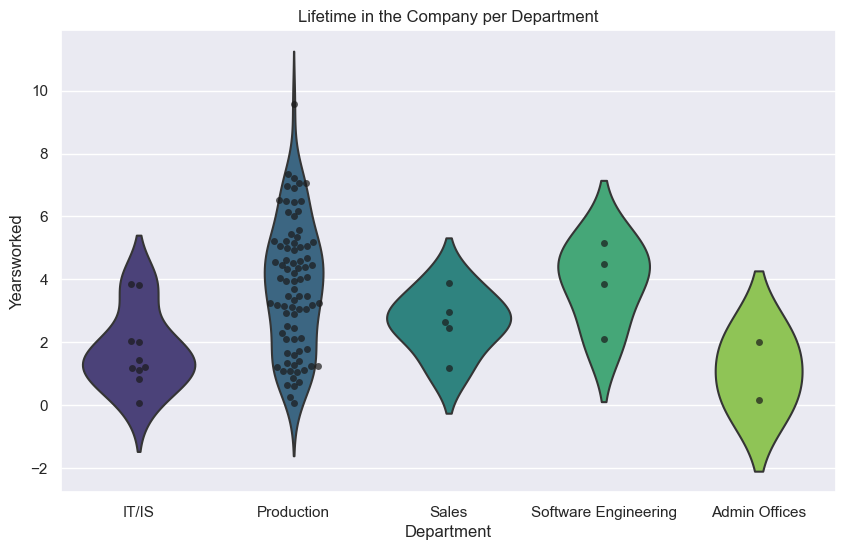

In [50]:
#now, we will create a violin plot to see the lifetime in the company per department by combining 2 type of graphs, to have clear vision of the amount of data in each case (to see the reliablilty of the visualization)
plt.figure(figsize=(10, 6))
#lets transform the days worked into years for more proper visualization
df_terminated['Yearsworked']=df_terminated['Daysworked'].apply(lambda x: x/365)
sns.swarmplot(x='Department', y='Yearsworked', data=df_terminated, color='k', alpha=0.7)
sns.violinplot(x='Department', y='Yearsworked', data=df_terminated, palette='viridis',inner=None)

plt.title('Lifetime in the Company per Department')
plt.show()

## Lets try and see if we can predict the rate of people leaving the company based on the parameters we have

In [51]:
#we want to see if the terminations can be predicted with an increased number of days being late at work
df_terminated['DaysLateLast30'].value_counts()

0    88
5     5
4     4
3     3
6     3
1     1
Name: DaysLateLast30, dtype: int64

### We see, there is no significant correlation between starting to be late at work and leaving the company

## Is there a correlation between the time of last performance review and the termination date?

In [52]:
#We will create another column with the number with the time between the clients leaving ant the date of the last review
df_terminated['DaysLastReviewtoQuitting'] = df_terminated['DateofTermination'] - df_terminated['LastPerformanceReview_Date']
df_terminated['DaysLastReviewtoQuitting']=pd.to_timedelta(df_terminated['DaysLastReviewtoQuitting'], unit='d')
df_terminated['DaysLastReviewtoQuitting'] = df_terminated['DaysLastReviewtoQuitting'].dt.days
df_terminated.dtypes

C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\1065579366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['DaysLastReviewtoQuitting'] = df_terminated['DateofTermination'] - df_terminated['LastPerformanceReview_Date']
C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\1065579366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['DaysLastReviewtoQuitting']=pd.to_timedelta(df_terminated['DaysLastReviewtoQuitting'], unit='d')
C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\106

Employee_Name                         object
EmpID                                 object
MarriedID                             object
MaritalStatusID                       object
GenderID                              object
EmpStatusID                           object
DeptID                                object
PerfScoreID                            int64
FromDiversityJobFairID                object
Salary                                 int64
Termd                                  int64
PositionID                            object
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

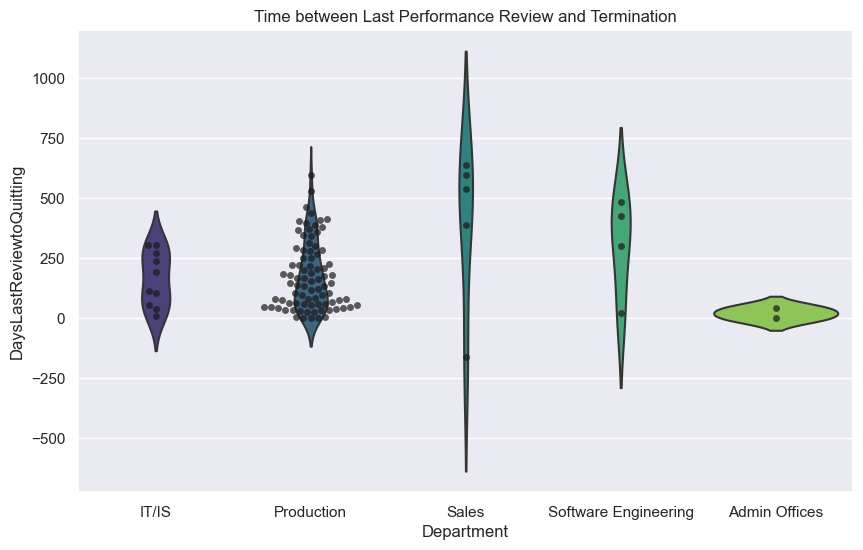

In [53]:
#now we will plot the results in a violin plot:
plt.figure(figsize=(10, 6))

sns.swarmplot(x='Department', y='DaysLastReviewtoQuitting', data=df_terminated, color='k', alpha=0.7)
sns.violinplot(x='Department', y='DaysLastReviewtoQuitting', data=df_terminated, palette='viridis',inner=None)
plt.title('Time between Last Performance Review and Termination')
plt.show()

### We see that in the Production department and also IT/IS, there is  some issues with the last performance review date, as it tooked in most cases, less than 1 year for people to leave after that performance review (compare to others that took more or which there is no correlation)

### Something could have been identified during that last session?

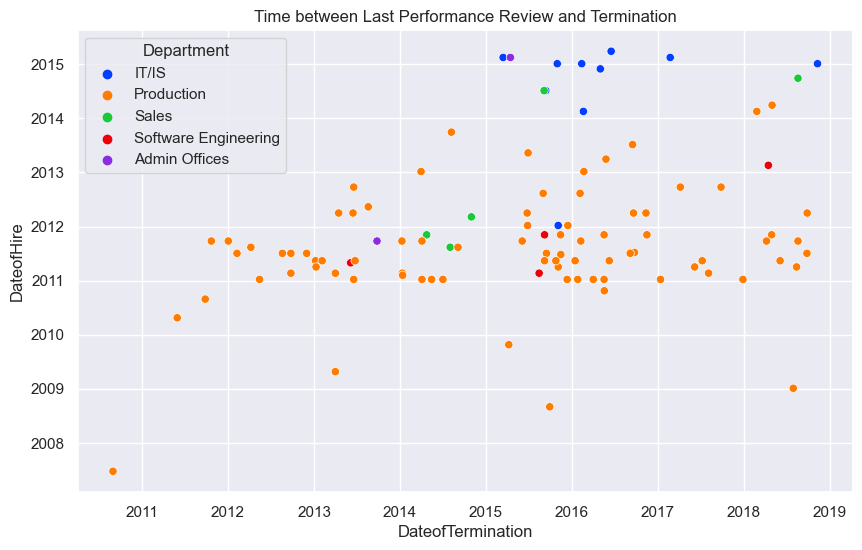

In [54]:
#Lets see if the dates of termination vs the dates of hire of the employees
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_terminated, x='DateofTermination', y='DateofHire', hue='Department', palette='bright')

plt.title('Time between Last Performance Review and Termination')

plt.show()

### We can see here there is two main issues: The first one is that the IT department is losing employees with low antiquity. The other one is that the Production department is losing employees with high antiquity.

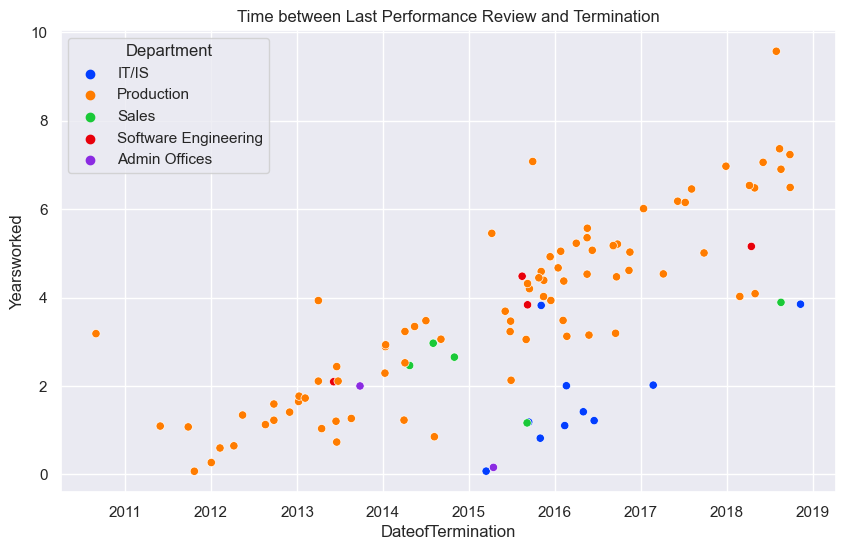

In [55]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_terminated, x='DateofTermination', y='Yearsworked', hue='Department', palette='bright')

plt.title('Time between Last Performance Review and Termination')
plt.show()

## We see that there is a lack of new hires for the production department and a constant flux of employees leaving eavery year. This leads to a crescendo in the antiquity of the employees quitting that we see in the last graph

C:\Users\Paul\AppData\Local\Temp\ipykernel_15864\2907775954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['Year_Termination'] = df_terminated['DateofTermination'].dt.to_period('Y')


<Figure size 1000x600 with 0 Axes>

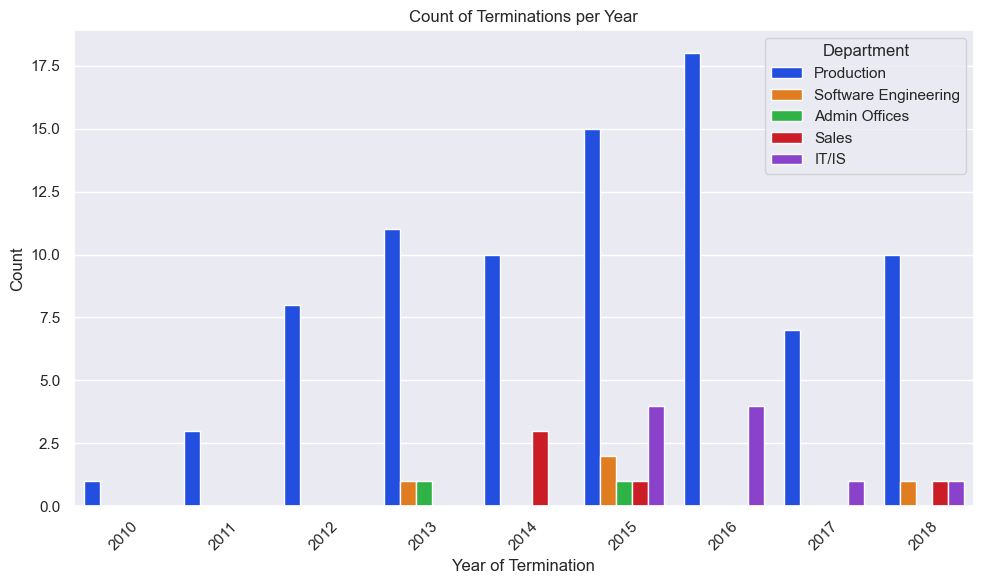

In [56]:
#lets see the amount of employees that left the company per year
plt.figure(figsize=(10, 6))

df_terminated['Year_Termination'] = df_terminated['DateofTermination'].dt.to_period('Y')
df_Year_Terminated_sorted = df_terminated.sort_values('Year_Termination')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_Year_Terminated_sorted, x='Year_Termination', hue='Department', palette='bright')

plt.title('Count of Terminations per Year')
plt.xlabel('Year of Termination')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### No only we see that there is a tendency of incresing the amount of people leaving the Production department, alsosomething happened in 2016, from which the tendency broke, but now is scaling up again

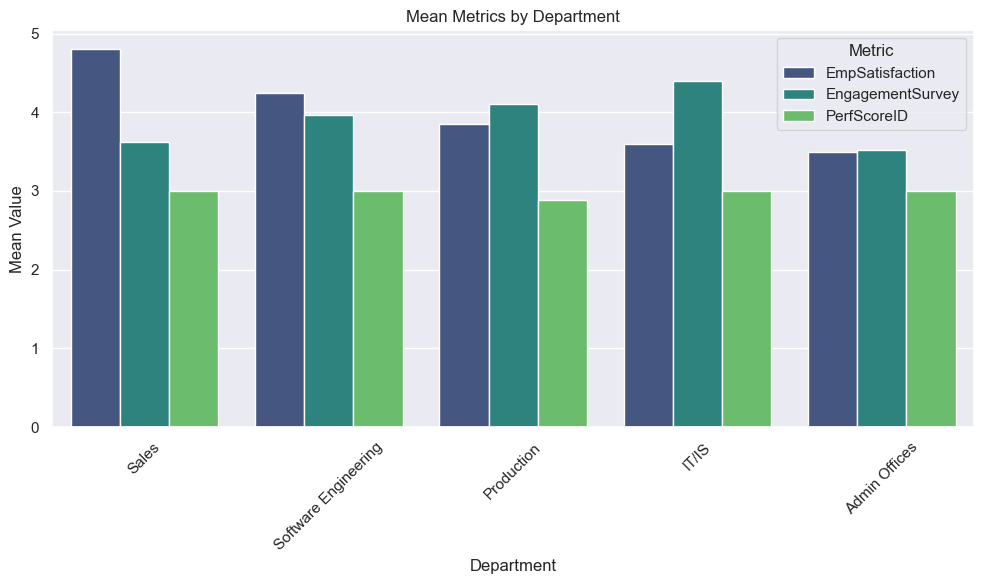

In [57]:
#Lets see the Scores of the employees that left the company, but per department
# Grouping and calculating the mean for each group
mean_emp_satisfaction_dep = df_terminated.groupby('Department')['EmpSatisfaction'].mean().sort_values(ascending=True)
mean_engagement_survey_dep = df_terminated.groupby('Department')['EngagementSurvey'].mean().sort_values(ascending=True)
mean_perf_score_dep = df_terminated.groupby('Department')['PerfScoreID'].mean().sort_values(ascending=True)

# Combining the means into a single DataFrame
df_means_dep = pd.DataFrame({
    'EmpSatisfaction': mean_emp_satisfaction_dep,
    'EngagementSurvey': mean_engagement_survey_dep,
    'PerfScoreID': mean_perf_score_dep
})

# Resetting the index to make 'ManagerName' a column
df_means_dep = df_means_dep.reset_index()

# Sorting the DataFrame by the mean of 'EmpSatisfaction' in descending order
df_means_dep = df_means_dep.sort_values(by='EmpSatisfaction', ascending=False)

# Melt the DataFrame to convert it into a long format
df_melted_dep = df_means_dep.melt('Department', var_name='Metric', value_name='Mean')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted_dep, x='Department', y='Mean', hue='Metric',palette='viridis')

plt.title('Mean Metrics by Department')
plt.xlabel('Department')
plt.ylabel('Mean Value')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### It seems that there is a problem with the Production department that happened years ago, kinda got fixed, and now is coming back again. It is not related to the Manager, nor the Special Projects Count of the departement. Our best guest is that it might be related to the lack of promotion inside this department which could affect at some point as well to the Satisfaction of the employees.
### Maybe a good option here is to implment a variable to measure/control the Job Position of the workers, and also ask to employees what are the source of their unhappiness in their job position